In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_asset_data(ticker,start,end,interval):
  ticker_y=yf.Ticker(ticker)
  data=ticker_y.history(start=start,end=end,interval=interval)
  return data[['Open','High','Low','Close','Volume']]

In [40]:
def compute_return(data):
  data['Log_returns'] = np.log(data.Close/data.Close.shift(1)).dropna()
  data['Log_return_onehot']=np.sign(data['Log_returns']).replace(0,1)
  return data

In [28]:
def compute_volatility(data):
    return data['Log_returns'].std()*252**.5

In [29]:
stock_name = "CAT" # the name of a soy stock, one of the sectors that was 
                    # mostly affected during the trade war
stockSoyBeans= yf.Ticker(stock_name)

stock_data=get_asset_data(stock_name,start="2018-01-01", end="2019-01-01", interval="1d")

In [30]:
stock_data_augmented = compute_return(stock_data)

In [31]:
stock_data_augmented.head(20)

,Open,High,Low,Close,Volume,Log_returns,Log_return_onehot
Date,,,,,,,
2018-01-03,142.035444,142.442459,140.552140,142.252518,4146100,0.001527,1.0
2018-01-04,142.804225,144.332754,142.017354,144.206131,4865800,0.013640,1.0
2018-01-05,144.947784,146.566764,144.387027,146.485367,3945400,0.015682,1.0
2018-01-08,148.429924,150.528249,147.018978,150.166473,5929200,0.024819,1.0
2018-01-09,150.437822,151.414634,149.316294,150.528259,4522900,0.002406,1.0
2018-01-10,150.048907,151.523171,148.782677,150.021774,5478600,-0.003370,-1.0
2018-01-11,150.953353,153.332071,149.813746,153.033600,4199000,0.019877,1.0
2018-01-12,153.748110,154.363132,153.060716,154.028488,4127900,0.006480,1.0
2018-01-16,156.380042,156.687567,151.559316,153.133057,8530600,-0.005830,-1.0


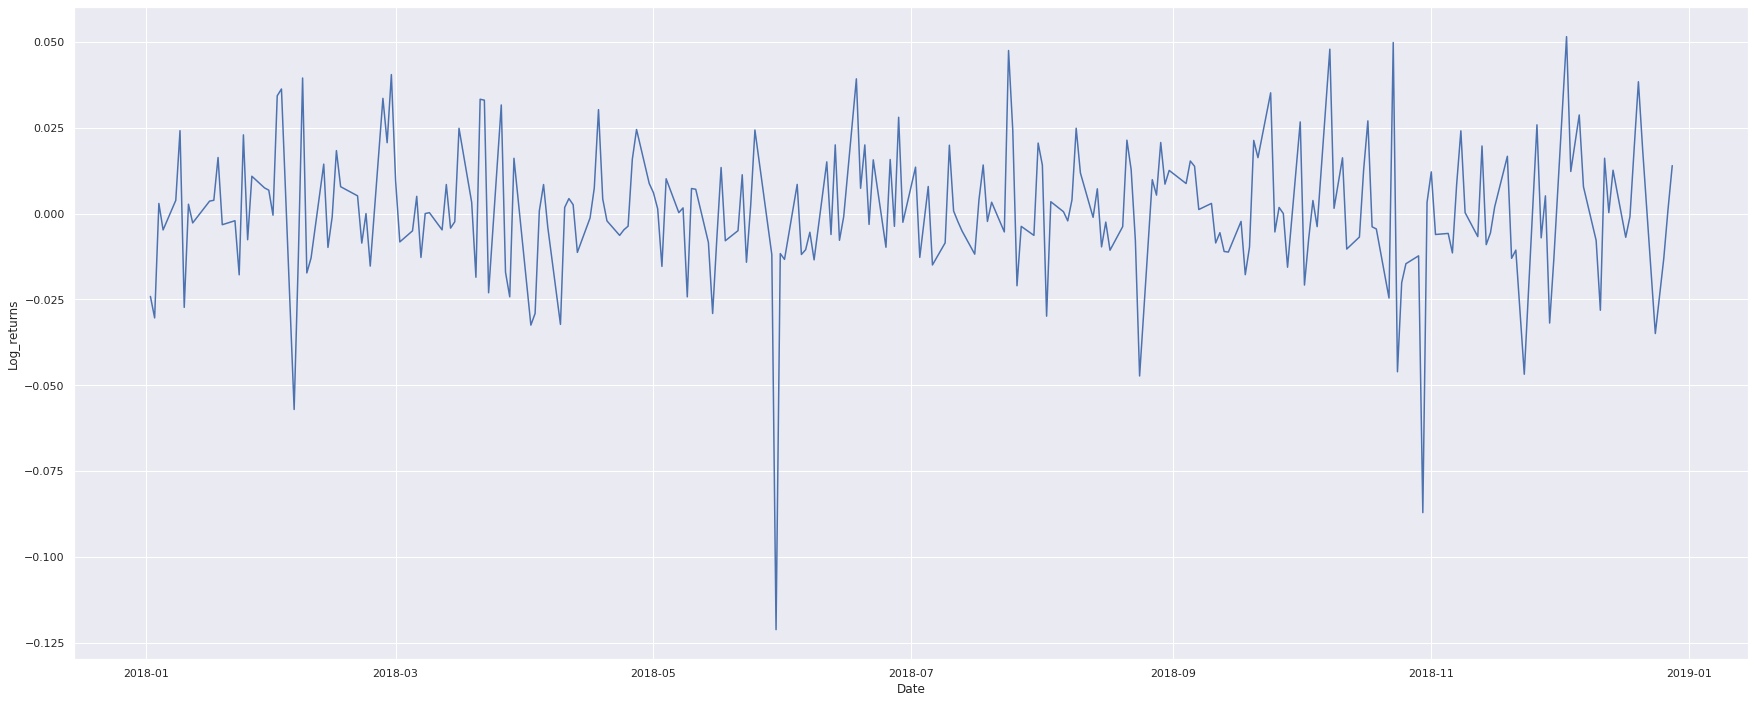

In [9]:
esns.set(rc={'figure.figsize':(30,12)})
sns.lineplot(data=stock_data_augmented, x="Date", y="Log_returns")

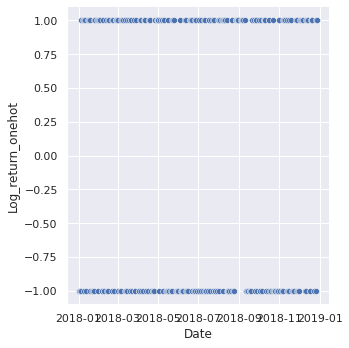

In [10]:
sns.set(rc={'figure.figsize':(80,12)})

sns.relplot(data=stock_data_augmented, x="Date", y="Log_return_onehot")

In [33]:
###Auto & Related
# GM: general motors
#CAT: Heavy equipment manufacturer Caterpillar
###technology
#Nvidia is a semiconductor company focused on visual computing
#Skyworks Solutions is a trailblazer in the semiconductor and wireless chip space
###Agriculture
#Agricultural commodity supplier and trader Bunge 
#Farm equipment maker Deere
###Transport
#Rail transportation stock CSX Corp
#Storied American company Harley-Davidson 
stocks=['GM','CAT','NVDA','SWKS','BG','DE','CSX','HOG']

In [34]:
from google.colab import files


In [42]:
for stock in stocks:
  stock_ticker= yf.Ticker(stock)
  stock_data=get_asset_data(stock,start="2017-12-30", end="2020-12-30", interval="1d")
  stock_data_augmented = compute_return(stock_data)
  stock_data_augmented.to_csv("{0}_data.csv".format(stock))
  files.download('{0}_data.csv'.format(stock))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>